Zacznijmy od wczytania niezbędnych pakietów:

In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt

tf.__version__ 

'2.4.1'

# MLP dla zadania regresji

W Keras możemy tworzyć modele na dwa różne sposoby:
- zbudować model sekwencyjny - nakładamy nowe warstwy na poprzednie. Nie możemy używać wielu inputów i outputów w modelu.
- używając API funkcyjnego - pozwala na uzycie wieli inputów i uotputów.

Zaczniemy od modelu sekwencyjnego. Musimy zacząć od inicjalizacji modelu:

In [3]:
boston_train_X = pd.read_csv("data/boston_train_X", sep=" ").to_numpy()
boston_test_X = pd.read_csv("data/boston_test_X", sep=" ").to_numpy()
boston_train_Y = pd.read_csv("data/boston_train_Y", sep=" ").to_numpy()
boston_test_Y = pd.read_csv("data/boston_test_Y", sep=" ").to_numpy()

print(boston_train_X.shape)
print(boston_train_Y.shape)

(404, 13)
(404, 1)


In [4]:
boston_train_X

array([[-0.27190919, -0.48301657, -0.43522197, ...,  1.14707815,
         0.44752224,  0.82419825],
       [-0.40292691,  2.9880792 , -1.33225971, ..., -1.7160613 ,
         0.43137112, -1.32755632],
       [ 0.12478548, -0.48301657,  1.02705233, ...,  0.78350488,
         0.22034405, -1.30687963],
       ...,
       [-0.401532  ,  0.98956951, -0.74059652, ..., -0.71623483,
         0.07934057, -0.6769297 ],
       [-0.17270603, -0.48301657,  1.24433806, ..., -1.7160613 ,
        -0.98642053,  0.42031351],
       [-0.40372555,  2.04141672, -1.20012649, ..., -1.30704138,
         0.23288242, -1.15249365]])

In [5]:
boston_train_Y

array([[15.2],
       [42.3],
       [50. ],
       [21.1],
       [17.7],
       [18.5],
       [11.3],
       [15.6],
       [15.6],
       [14.4],
       [12.1],
       [17.9],
       [23.1],
       [19.9],
       [15.7],
       [ 8.8],
       [50. ],
       [22.5],
       [24.1],
       [27.5],
       [10.9],
       [30.8],
       [32.9],
       [24. ],
       [18.5],
       [13.3],
       [22.9],
       [34.7],
       [16.6],
       [17.5],
       [22.3],
       [16.1],
       [14.9],
       [23.1],
       [34.9],
       [25. ],
       [13.9],
       [13.1],
       [20.4],
       [20. ],
       [15.2],
       [24.7],
       [22.2],
       [16.7],
       [12.7],
       [15.6],
       [18.4],
       [21. ],
       [30.1],
       [15.1],
       [18.7],
       [ 9.6],
       [31.5],
       [24.8],
       [19.1],
       [22. ],
       [14.5],
       [11. ],
       [32. ],
       [29.4],
       [20.3],
       [24.4],
       [14.6],
       [19.5],
       [14.1],
       [14.3],
       [15

In [22]:
boston_model = tf.keras.Sequential()

W następnym kroku możemy dodać kilka warstw (pamiętaj, że nie musimy ponownie przypisywać modelu za pomocą `=`):

In [24]:
boston_model.add(
    tf.keras.layers.Dense(units = 16, # Liczba neuronów w warstwie ukrytej
                             activation = "tanh", # Funkcja aktywacji
                             input_shape = (13,)) # Liczba predyktorów - tylko w pierwszej warstwie
)
boston_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_7 (Dense)              (None, 1156)              19652     
Total params: 19,876
Trainable params: 19,876
Non-trainable params: 0
_________________________________________________________________


Dlaczego mamy 224 parametry?

In [8]:
13 * 16 + 16

224

Po dodaniu warstwy ukrytej możemy dodać warstwę wyjściową:

In [21]:
boston_model.add(
    tf.keras.layers.Dense(units = 1, # Liczba neuronów w warstwie wyjścia - chcemy dostać 1 liczbę
                             activation = "linear") # Funkcja liniowa dla regresji
)
boston_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                224       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


Możemy teraz skonfigurować model do treningu. Użyjemy SGD jako optymalizatora, MSE jako funkcji straty i dodamy MAE jako dodatkową metrykę.

In [10]:
boston_model.compile(
    optimizer = "sgd",
    loss = "mse",
    metrics = ("mae"))

Jesteśmy gotowi do trenowania naszej pierwszej sieci neuronowej:

In [12]:
history = boston_model.fit(
    x = boston_train_X,
    y = boston_train_Y,
    validation_split = 0.2, # 20% zbioru uczącego przeznaczonego na walidację
    epochs = 5, # Liczba "pętli/przejść" bo całym zbiorze treningowym
    batch_size = 30, # Wielkość próbki (batcha) dla jednej iteracji algorytmu SGD
    verbose = 1)

Epoch 1/5
11/11 [==============================] - 1s 34ms/step - loss: 453.6279 - mae: 19.1620 - val_loss: 108.6180 - val_mae: 7.5143
Epoch 2/5
11/11 [==============================] - 0s 5ms/step - loss: 52.0225 - mae: 4.6957 - val_loss: 47.1116 - val_mae: 4.5743
Epoch 3/5
11/11 [==============================] - 0s 5ms/step - loss: 32.9119 - mae: 3.9052 - val_loss: 38.8763 - val_mae: 4.1960
Epoch 4/5
11/11 [==============================] - 0s 5ms/step - loss: 32.0911 - mae: 3.8569 - val_loss: 34.6116 - val_mae: 4.1021
Epoch 5/5
11/11 [==============================] - 0s 5ms/step - loss: 24.4608 - mae: 3.3153 - val_loss: 30.8610 - val_mae: 3.9456


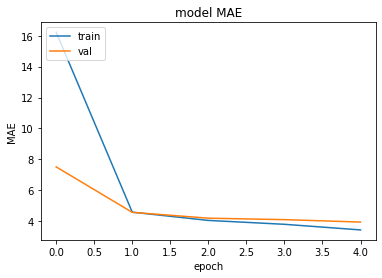

In [13]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Możemy teraz ocenić wytrenowany model w testowym zestawie danych:

In [14]:
boston_model.evaluate(boston_test_X, boston_test_Y)

4/4 [==============================] - 0s 2ms/step - loss: 26.5659 - mae: 3.8101


[26.565889358520508, 3.8101322650909424]

I policzyć predykcje:

In [15]:
boston_predictions = boston_model.predict(boston_test_X)
boston_predictions

array([[ 9.680969 ],
       [22.43087  ],
       [22.07521  ],
       [31.057392 ],
       [26.572979 ],
       [22.179031 ],
       [31.118404 ],
       [27.203922 ],
       [18.62447  ],
       [24.351208 ],
       [17.707108 ],
       [19.4862   ],
       [15.723689 ],
       [32.688004 ],
       [22.2858   ],
       [22.235645 ],
       [25.151424 ],
       [24.308792 ],
       [22.448608 ],
       [27.700634 ],
       [12.209696 ],
       [14.877916 ],
       [23.382725 ],
       [14.355509 ],
       [23.630695 ],
       [26.440746 ],
       [32.137775 ],
       [24.515335 ],
       [11.727236 ],
       [23.048882 ],
       [26.04049  ],
       [16.91517  ],
       [33.447342 ],
       [23.968658 ],
       [21.287804 ],
       [ 6.3030787],
       [16.596699 ],
       [23.181995 ],
       [18.681175 ],
       [29.082111 ],
       [23.85801  ],
       [29.553703 ],
       [17.66771  ],
       [32.001213 ],
       [29.568184 ],
       [23.758255 ],
       [30.151062 ],
       [18.94

Na koniec możemy zapisać nasz model na dysku twardym:

In [16]:
if not os.path.exists("models"):
    os.mkdir("models")
boston_model.save("models/boston_model.hdf5")

# MLP dla zadania klasyfikacji binarnej

Budując MLP (lub inną sieć neuronową) dla zadania klasyfikacji musimy zmienić tylko kilka drobnych detali w naszym kodzie. Zacznijmy od wczytania zbioru danych z informacjami o fraudach na kartach kredytowych i inicjalizacji modelu:

In [28]:
creditcard_train_X = pd.read_csv("data/creditcard_train_X", sep=" ").to_numpy()
creditcard_test_X = pd.read_csv("data/creditcard_test_X", sep=" ").to_numpy()
creditcard_train_Y = pd.read_csv("data/creditcard_train_Y", sep=" ").to_numpy()
creditcard_test_Y = pd.read_csv("data/creditcard_test_Y", sep=" ").to_numpy()

print(creditcard_train_X.shape)
print(creditcard_train_Y.shape)

(227845, 29)
(227845, 1)


Zanim zbudujemy model, przekształcimy wektor odpowiedzi (klas) do formatu one-hot-encoding:

In [29]:
creditcard_train_Y = tf.keras.utils.to_categorical(creditcard_train_Y, 2)
creditcard_test_Y = tf.keras.utils.to_categorical(creditcard_test_Y, 2)
print(creditcard_train_Y.shape)

(227845, 2)


In [30]:
creditcard_train_Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [31]:
creditcard_model = tf.keras.Sequential()

Następnie dodajmy warstwy ukryte:

In [32]:
creditcard_model.add(
    tf.keras.layers.Dense(units = 20, # Liczba neuronów w warstwie ukrytej
                             activation = "relu", # Funkcja aktywacji
                             input_shape = (29,)) # Liczba predyktorów - tylko w pierwszej warstwie
)
creditcard_model.add(
    tf.keras.layers.Dense(units = 10, # Liczba neuronów w warstwie ukrytej
                             activation = "relu") # Funkcja aktywacji
)
creditcard_model.add(
    tf.keras.layers.Dense(units = 5, # Liczba neuronów w warstwie ukrytej
                             activation = "relu") # Funkcja aktywacji
)
creditcard_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


Oraz warstwę wyjściową:

In [33]:
creditcard_model.add(
    tf.keras.layers.Dense(units = 2, # Liczba neuronów w warstwie wyjścia - dwie klasy
                             activation = "softmax") # Funkcja aktywacji - softmax dla klasykikacji
)
creditcard_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 20)                600       
_________________________________________________________________
dense_9 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 12        
Total params: 877
Trainable params: 877
Non-trainable params: 0
_________________________________________________________________


Możemy teraz skonfigurować model do treningu. Użyjemy SGD jako optymalizatora, Entropii Krzyżowej jako funkcji straty i dodamy Accuracy jako dodatkową metrykę.

In [34]:
creditcard_model.compile(
    optimizer = "sgd",
    loss = "categorical_crossentropy",
    metrics = ("accuracy"))

I wytrenować go:

In [35]:
history = creditcard_model.fit(
    x = creditcard_train_X,
    y = creditcard_train_Y,
    validation_split = 0.2, # 20% zbioru uczącego przeznaczonego na walidację
    epochs = 5, # Liczba "pętli/przejść" bo całym zbiorze treningowym
    batch_size = 256, # Wielkość próbki (batcha) dla jednej iteracji algorytmu SGD
    verbose = 1)

Epoch 1/5
713/713 [==============================] - 2s 2ms/step - loss: 0.3299 - accuracy: 0.9780 - val_loss: 0.0702 - val_accuracy: 0.9985
Epoch 2/5
713/713 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9984 - val_loss: 0.0384 - val_accuracy: 0.9985
Epoch 3/5
713/713 [==============================] - 1s 2ms/step - loss: 0.0467 - accuracy: 0.9984 - val_loss: 0.0238 - val_accuracy: 0.9985
Epoch 4/5
713/713 [==============================] - 1s 2ms/step - loss: 0.0271 - accuracy: 0.9982 - val_loss: 0.0262 - val_accuracy: 0.9985
Epoch 5/5
713/713 [==============================] - 1s 2ms/step - loss: 0.0226 - accuracy: 0.9981 - val_loss: 0.0133 - val_accuracy: 0.9985


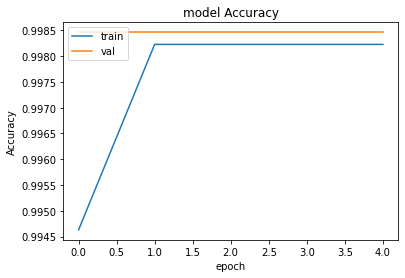

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [37]:
creditcard_model.evaluate(creditcard_test_X, creditcard_test_Y)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0151 - accuracy: 0.9983


[0.015111633576452732, 0.9982619881629944]

In [38]:
creditcard_predictions = creditcard_model.predict(creditcard_test_X)
creditcard_predictions

array([[9.9927360e-01, 7.2644599e-04],
       [9.9539232e-01, 4.6076542e-03],
       [9.9853575e-01, 1.4642633e-03],
       ...,
       [9.9145728e-01, 8.5427640e-03],
       [9.8818654e-01, 1.1813478e-02],
       [9.9831641e-01, 1.6835924e-03]], dtype=float32)

Model może wydawać się dobry, jednakże wcale taki nie jest:

In [39]:
pd.crosstab(creditcard_test_Y[:, 1], np.argmax(creditcard_model.predict(creditcard_test_X), axis=-1),
           rownames = ["true"], colnames = ["predicted"])

predicted,0
true,
0.0,56863
1.0,99


# Dropout i checkpointy

Jednym z powodów przez które nasz model zawiódł może być brak regularyzacji, która jest niezwykle ważna w przypadku mocno niezbalansowanych zbiorów lub kiepska architektura sieci:

In [41]:
creditcard_model2 = tf.keras.Sequential()
creditcard_model2.add(
    tf.keras.layers.Dense(units = 256, # Liczba neuronów w warstwie ukrytej
                             activation = "relu", # Funkcja aktywacji
                             input_shape = (29,)) # Liczba predyktorów - tylko w pierwszej warstwie
)
creditcard_model2.add(tf.keras.layers.Dropout(0.1))
creditcard_model2.add(
    tf.keras.layers.Dense(units = 256, # Liczba neuronów w warstwie ukrytej
                             activation = "relu") # Funkcja aktywacji
)
creditcard_model2.add(tf.keras.layers.Dropout(0.1))
creditcard_model2.add(
    tf.keras.layers.Dense(units = 2, # Liczba neuronów w warstwie wyjścia
                             activation = "softmax") # Funkcja aktywacji
)
creditcard_model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 256)               7680      
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 514       
Total params: 73,986
Trainable params: 73,986
Non-trainable params: 0
_________________________________________________________________


Trenowanie sieci neuronowej może zająć dużo czasu, a rozwiązanie rzeczywistego problemu może zająć dni, tygodnie, a nawet miesiące. W tym czasie wiele rzeczy może pójść nie tak, na przykład jeśli twój komputer zresetuje się z nieznanego powodu, stracisz cały postęp i dużo czasu! Aby rozwiązać ten problem, możemy dodać punkt kontrolny modelu, który będzie zapisywać model w każdej epoce. Punkt kontrolny modelu jest jednym z wielu wywołań zwrotnych, których możesz używać w Keras podczas procesu szkolenia.

Kolejnym przydatnym callbackiem jest **Early stopping** umożliwiający zatrzymanie procesu uczenia jeśli wyniki sieci nie ulegają polepszeniu. Jest to kolejna metoda regularyzacji zapobiegająca przeuczeniu modelu.

In [42]:
creditcard_model2.compile(
    optimizer = "sgd",
    loss = "categorical_crossentropy",
    metrics = ("accuracy"))

In [43]:
history = creditcard_model2.fit(
    x = creditcard_train_X,
    y = creditcard_train_Y,
    validation_split = 0.2, # 20% zbioru uczącego przeznaczonego na walidację
    epochs = 100, # Liczba "pętli/przejść" bo całym zbiorze treningowym
    batch_size = 256, # Wielkość próbki (batcha) dla jednej iteracji algorytmu SGD
    verbose = 1,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10),
                tf.keras.callbacks.ModelCheckpoint(filepath = "models/creditcard_best.hdf5",
                                                  monitor = "val_loss", save_best_only = True)]
)

Epoch 1/100
713/713 [==============================] - 2s 2ms/step - loss: 0.1387 - accuracy: 0.9935 - val_loss: 0.0435 - val_accuracy: 0.9985
Epoch 2/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9982 - val_loss: 0.0229 - val_accuracy: 0.9987
Epoch 3/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0355 - accuracy: 0.9984 - val_loss: 0.0177 - val_accuracy: 0.9988
Epoch 4/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0260 - accuracy: 0.9987 - val_loss: 0.0135 - val_accuracy: 0.9990
Epoch 5/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0189 - accuracy: 0.9988 - val_loss: 0.0124 - val_accuracy: 0.9991
Epoch 6/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0187 - accuracy: 0.9987 - val_loss: 0.0101 - val_accuracy: 0.9990
Epoch 7/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0153 - accuracy: 0.9989 - val_loss: 0.0110 - val_accuracy: 0.9990

Epoch 58/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0055 - val_accuracy: 0.9991
Epoch 59/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0074 - accuracy: 0.9989 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 60/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 61/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 62/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0043 - val_accuracy: 0.9991
Epoch 63/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9992
Epoch 64/100
713/713 [==============================] - 1s 2ms/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy:

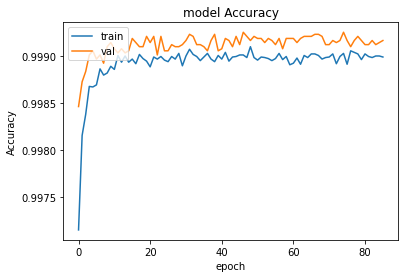

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
creditcard_model2.evaluate(creditcard_test_X, creditcard_test_Y)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0046 - accuracy: 0.9991


[0.004628321155905724, 0.9991222023963928]

In [46]:
pd.crosstab(creditcard_test_Y[:, 1], np.argmax(creditcard_model2.predict(creditcard_test_X), axis=-1),
           rownames = ["true"], colnames = ["predicted"])

predicted,0,1
true,,
0.0,56853,10
1.0,40,59


# MLP dla zadania regresji wieloklasowej - praca domowa

W podobny sposób możemy zbudować model sekwencyjny dla problemu klasyfikacji wieloklasowej. Korzystając ze zbioru FASHION MNIST zbuduj sieć MLP, która klasyfikuje dany obraz do jedne z 10 klas:

 - 0	T-shirt/top
 - 1	Trouser
 - 2	Pullover
 - 3	Dress
 - 4	Coat
 - 5	Sandal
 - 6	Shirt
 - 7	Sneaker
 - 8	Bag
 - 9	Ankle boot

In [47]:
fashion_mnist_train_X = pd.read_csv("data/fashion_mnist_train_X", sep=" ").to_numpy()
fashion_mnist_test_X = pd.read_csv("data/fashion_mnist_test_X", sep=" ").to_numpy()
fashion_mnist_train_Y = pd.read_csv("data/fashion_mnist_train_Y", sep=" ").to_numpy()
fashion_mnist_test_Y = pd.read_csv("data/fashion_mnist_test_Y", sep=" ").to_numpy()

fashion_mnist_train_X = fashion_mnist_train_X / 255
fashion_mnist_test_X = fashion_mnist_test_X / 255

print(fashion_mnist_train_X.shape)
print(fashion_mnist_train_Y.shape)

(60000, 784)
(60000, 1)


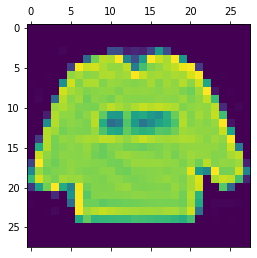

In [48]:
import matplotlib.pyplot as plt
plt.matshow(fashion_mnist_train_X[0,:].reshape((28,28)))

In [ ]:
# TASK: Create MLP for fashion MNIST classification.
# Change labels vectors to one-hot-encoding matrix using to_categorical() method

# Model architecture:
# Dense layer with 512 units and "relu" activation
# Dropout layer with 20% drop rate
# Dense layer with 512 units and "relu" activation
# Dropout layer with 20% drop rate
# Output dense layer (how many units and what activation should You use?)

# Set SGD as optimizer and use categorical crossentropy as loss function. Use accuracy as additional metric.

# Fit the model. Use 20% of the data for validation, 20 epochs and 128 samples for batch size.
# Use model checkpoint and early stopping.

# Evaluate model on test set.